<a href="https://colab.research.google.com/github/cazhu/xgbTS/blob/dev/run_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

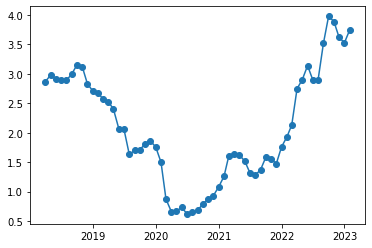

In [17]:
# load time series data
import pandas_datareader as pdr

# Reading 10-year constant maturity yields on U.S. government bonds    
df = pdr.get_data_fred('GS10').reset_index()
# Look at the data read
plt.plot(df['DATE'], df['GS10'], marker='o')

In [20]:
df.head()

,DATE,GS10
0,2018-04-01,2.87
1,2018-05-01,2.98
2,2018-06-01,2.91
3,2018-07-01,2.89
4,2018-08-01,2.89


In [24]:
# get calendar features

# month_of_year
df['month_of_year'] = df['DATE'].apply(lambda x: x.month)

# year
df['year'] = df['DATE'].apply(lambda x: x.year)

df.head(5)


,DATE,GS10,month_of_year,year
0,2018-04-01,2.87,4,2018
1,2018-05-01,2.98,5,2018
2,2018-06-01,2.91,6,2018
3,2018-07-01,2.89,7,2018
4,2018-08-01,2.89,8,2018


In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['month_of_year', 'year']], df['GS10'], test_size=.2)
# create model instance
bst = XGBRegressor(n_estimators=2, max_depth=2, learning_rate=1)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)


array([1.309607 , 1.309607 , 1.309607 , 1.309607 , 2.9020588, 2.1916807,
       3.0298452, 2.1916807, 3.0298452, 2.1916807, 3.0298452, 2.9020588],
      dtype=float32)

In [28]:
y_test

35    1.61
41    1.37
36    1.64
43    1.56
8     2.83
11    2.57
52    2.90
15    2.06
54    3.98
20    1.86
49    2.90
1     2.98
Name: GS10, dtype: float64